## <h1 align="center">Actividad 2: Agrupar datos textuales con el Modelo de Tópicos y el algoritmo Latent Dirichlet Allocation (LDA)</h3>

In [1]:
!python -V

Python 3.6.4 :: Anaconda custom (64-bit)


<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<h2> Preámbulo</h2>
<p> Esta actividad se inspira de ejercicios disponibles en los recursos siguientes:<p>
<ul>
    <li>Biblioteca <a href="http://scikit-learn.org/stable/install.html/">SciKit-learn</a> de Python</li>
    <li>Código disponible en  <a href="https://github.com/lda-project/lda/">lda-project</a></li>
</ul>
<p> La actividad requiere el uso de Python 3.x y <a href="http://jupyter.org/install">Jupyter Notebook</a>. El código entregado fue probado con Python 3.6.1. Para saber cuál versión de Python usted está utilizando, ejecutar la celda siguiente (está información es importante cuando se necesitará instalar nuevos paquetes.)
</p>
</div>

<div style="border: 2px solid #D24747; background-color:#F8B4B4">
<h2>Objetivos de la actividad</h2>
<p>El <b>objetivo general</b> de esta actividad consiste en saber explorar la estructura oculta de un conjunto de datos textuales.</p>
<p> Comenzaremos por utilizar un  algoritmo de clustering tradicional como Kmeans para explorar datos textuales, considerando la medida tf-idf por cada término presente en cada texto, para caracterizar los textos y construir distancias entre ellos.</p>
<p>En una segunda fase utilizaremos el <a href="https://drive.google.com/open?id=1rSQPJvRVj0V_IChzspQMRPNwlDTkHYHp"> Modelo Probabilista De Tópicos </a> para descubrir tópicos en los textos. Para ello se utilizará el algoritmo de asignación de tópicos latentes conocido como <a href= "https://drive.google.com/open?id=1BobImO3192hifZPLXowd14gryVAUzBPW">Latent Dirichlet Allocation (LDA)</a>. El enfoque es probabilista, por lo que el resultado del algoritmo es descubrir tópicos en los textos (el número de tópicos es definido por el analista) y asignar una distribución de probabilidad de tópicos en cada texto.</p>  Dependiendo del tamaño de los textos, es también posible agruparlos de acuerdo al tópico con mayor representación en cada uno, lo que permitirá comparar esta metodología con los algoritmos de clustering clásicos.</p> </div>
    
  

<div style="border: 2px solid #D24747; background-color:#F8B4B4">
<p>En el primer ejemplo se busca encontrar estructuras ocultas en el discurso de Donald Trump. Con este objetivo, vamos a utilizar un dataset de 297 tweets publicados por Donald Trump entre el 5 diciembre 2016 y el 27 de enero 2017 (aproximadamente 1 mes después su elección).</p>   
<p>El primer paso es la lectura de datos: </p></div>

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Cargar el dataset de tweets
df_tweets = pd.read_csv('datasets/trump_tweets.csv')
df_tweets

,Date,Time,Tweet,Tweetid
0,2016-12-05 13:53:11+00:00,13:53:11,I am thrilled to nominate Dr. @RealBenCarson a...,805772007220645000
1,2016-12-05 16:00:27+00:00,16:00:27,If the press would cover me accurately &amp; h...,805804034309427000
2,2016-12-05 23:06:43+00:00,23:06:43,#ThankYouTour2016 \r\n\r\n12/6- North Carolina...,805911307270713000
3,2016-12-06 13:52:35+00:00,13:52:35,Boeing is building a brand new 747 Air Force O...,806134244384899000
4,2016-12-06 16:45:27+00:00,16:45:27,"Join me tonight in Fayetteville, North Carolin...",806177746397306000
5,2016-12-06 19:09:49+00:00,19:09:49,Masa (SoftBank) of Japan has agreed to invest ...,806214078465245000
6,2016-12-06 19:10:27+00:00,19:10:27,Masa said he would never do this had we (Trump...,806214236053667000
7,2016-12-06 21:17:45+00:00,21:17:45,Departing New York with General James 'Mad Dog...,806246271405162000
8,2016-12-07 03:33:20+00:00,3:33:20,"A great night in Fayetteville, North Carolina....",806340792247795000
9,2016-12-07 12:18:56+00:00,12:18:56,I will be interviewed on the @TODAYshow at 7:3...,806473064703725000


In [3]:
#selección de los mensajes
docs = df_tweets["Tweet"].as_matrix()
len(docs)


297

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import adjusted_rand_score

stemmer = SnowballStemmer("english")

# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens


[nltk_data] Downloading package stopwords to /home/alan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/alan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


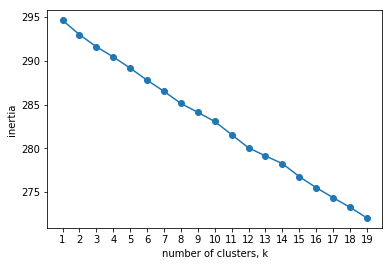

In [7]:
#Utilizando Kmeans y tf-idf para realizar un primer agrupamiento de los mensajes
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectorizer = TfidfVectorizer(stop_words='english',tokenizer=tokenize_and_stem, ngram_range=(1,3))
X = vectorizer.fit_transform(docs)
num_k = range(1, 20)
inertias = []

for k in num_k:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(X)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)



# Plot ks vs inertias
plt.plot(num_k, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(num_k)
plt.show()

<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº1: Explore las clases TfidfVectorizer, CountVectorizer. ¿Qué rol cumplen? ¿Qué tratamiento premilinar de textos se ha hecho en este caso? Qué rol cumple n-gram? 
<ul>
    <li>CountVectorizer: Se usa para convertir los registros de texto en una matriz que contiene los conteos de tokens</li>
    <li>TfidfVectorizer: Se usa para convertir una colección de textos que no han sido procesados en una matriz de funciones TF-IDF.</li>
    <li>Se ha dividido en una lista de respectivas palabras (o tokens) y  se ha derivado cada token, además se han descartado los stopwords del idioma inglés.</li>
    <li>n-gram permite definir la cantidad de n-gramas que se utilizaran. Es la cantidad de caracteres contiguos que se tomarán para el reconocimiento de los tokens.</li>
    </ul>
</p>
<p>Pregunta Nº2: A partir del gráfico, justifique el número de clusters para estos datos.: El número de clusters se toma en el punto justo antes de que haya una disminución o cambio notorio en la pendiente al graficar. En este caso entre el punto 6 y 7 podemos notar esta disminución en la pendiente.</p>
</div>

Top terms per cluster:
Cluster 0: vote time state result mani elect world countri enjoy divid
Cluster 1: make happi year rt thing new https look forward new year
Cluster 2: peopl news trump great today fake fake news 's n't enjoy
Cluster 3: https ticket ticket https join thankyoutour2016 congratul interview secretari tonight state
Cluster 4: veri did like whi hack success media great knew peopl
Cluster 5: job thank https watch bring america watch https u.s. import focus


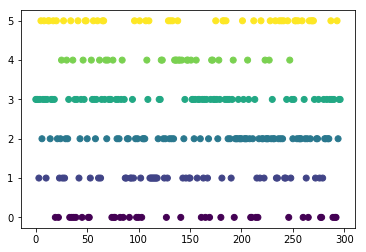

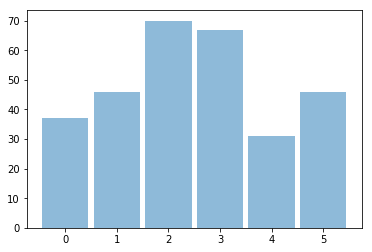

In [8]:
from matplotlib.pylab import hist, show
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    cluster_words = np.array(terms)[order_centroids[i, :10]]
    print('Cluster {}: {}'.format(i, ' '.join(cluster_words)))

#Generando algunos gráficos de los resultados
labels = model.predict(X)
plt.scatter(range(297),labels,c=labels)
show()
hist(labels,bins=np.arange(-0.5,5.6,1),alpha=0.5,rwidth=0.9)
show()

                                    

<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº2:Explore diversos valores en los parametros n_init y max_iter. ¿Tienen influencia en los resultados? Describa e interprete los resultados.: Si tienen influencia. En particular max_iter llega un momento en que ya no produce cambios (probablemente porque se ha logrado el óptimo antes y seguir aumentando los valores de max_iter no ayuda porque no se usarán más iteraciones que las necesarias. En el caso de n_init hay variaciones pero al realizar cambios más grandes, en pequeños cambios en la cantidad no se ve gran diferencia. Los resultados después de cierto valor para ambos parámetros se mantienen fijos (al ir aumentando más ambos)</p></div>

<div style="border: 2px solid #1c75c8; background-color: #F8B4B4">
<p>En lo que sigue se construye un modelo probabilista de tópicos, considerando 9 tópicos (para comparar con Kmeans
 y el algoritmo LDA estimado con el <a href="https://drive.google.com/open?id=1AoCcmg91Y1yRwM_Ox4Nvf6PGSQ9TybpE">, método de Bayes Variacional</a>, disponible como desarrollo en <a href="http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html">sklearn-lda.</a></p> 
Previo a ello se utiliza la clase CountVectorizer y su función fit_transform que permite construir una matriz tf (DTM, Document-Term Matrix) que contiene la frecuencia de aparición de cada término del vocabulario en cada texto analizado. En la definición de la clase se especifica que:
<ol>
    <li>los términos que  aparecen sólo una vez en algún texto no serán considerados en el vocabulario (min_df=2)</li>
    <li> los términos que  aparecen en mas del 95% de los textos no serán considerados en el vocabulario (max_df=0.95)</li>
    <li> se utilizará un conjunto de stop words del inglés </li>
</ol></div>

In [9]:
#Aplicando Modelos Probabilistas de Tópicos y LDA
from sklearn.decomposition import LatentDirichletAllocation

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                stop_words='english',tokenizer=tokenize_and_stem, ngram_range=(1,3))
tf = tf_vectorizer.fit_transform(docs)
diccionario= tf_vectorizer.get_feature_names()


#Estimación de LDA con Bayes Variacional
lda = LatentDirichletAllocation(n_components=true_k, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

lda.fit(tf)
#Cálculo de índice de ajuste de los datos
print(lda.perplexity(tf))
print("\nTopics in LDA model:")
print_top_words(lda, diccionario, 10)


1078.5645155271538

Topics in LDA model:
Topic #0: peopl just vote look n't did 's mani support year
Topic #1: news fake fake news make big number presid time total rate
Topic #2: https great job thank bring meet america togeth amp trump
Topic #3: interview enjoy tonight https abc time today year p.m. davidmuir
Topic #4: n't washington d.c. hack d.c. doe washington russia whi doe n't wonder
Topic #5: veri great state today https border u.s. build vote wall



<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº4: Indage sobre la medida perplexity, ¿Cómo se interpreta el valor obtenido? Es una medida para evaluar el modelo de tópicos. A menor valor de perplexity mejor es el modelo.
</p></div>

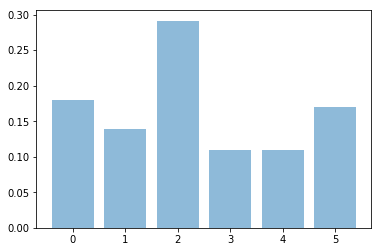

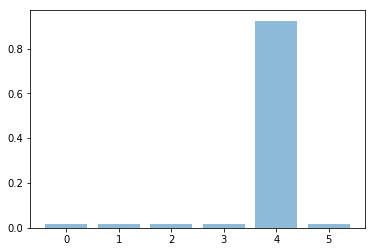

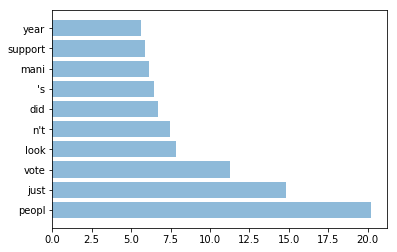

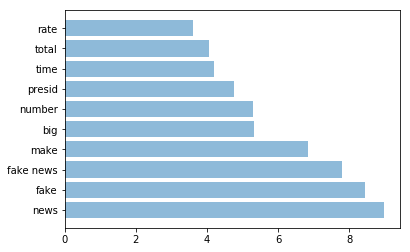

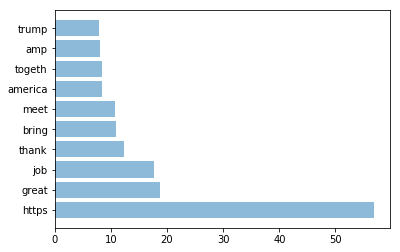

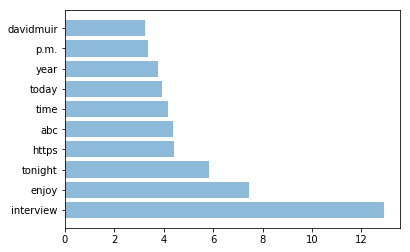

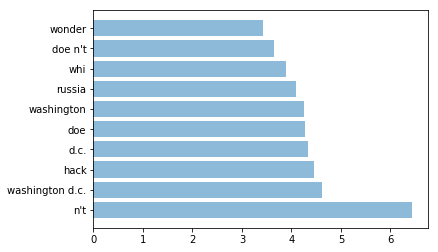

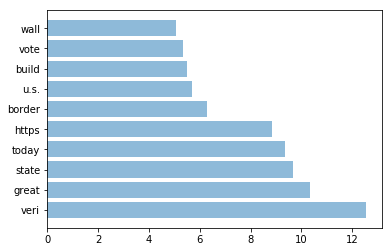

In [10]:
#Generando algunos gráficos de los resultados
from matplotlib.pylab import hist, show
import seaborn as sns

y=lda.fit_transform(tf)

#distribución de tópicos en todos los documentos
dist = sum(y)/len(docs)
w=np.arange(0,true_k)
plt.bar(w,height=dist,alpha=0.5,tick_label=w)
show()
#distribución de tópicos en el documento 100
plt.bar(w,height=y[100],alpha=0.5,tick_label=w)
show()


#frecuencia de palabras por tópico
n_top_words=10
numo =np.arange(0,n_top_words)
for idx,topic in enumerate(lda.components_):
    d =[]
    s = []
    for i in topic.argsort()[:-n_top_words - 1:-1]:
          s.append(diccionario[i])
          d.append(topic[i])
    
    plt.barh(numo,width=d,alpha=0.5,tick_label=s)
    show()


<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº5: Interprete estos gráficos. Podemos ver en los gráficos las palabras más frecuentes en cada tópico y su respectiva frecuencia. En los primeros gráficos vemos como se distribuyen los tópicos en el total de los documentos (el tópico 2 es el más frecuente) y como se distribuyen en el documento 100 (en que el tópico 4 es el único con relevancia, esto nos puede hacer pensar que la clasificación de los documentos en estos tópicos es bastante excluyente, pero podemos ver en el gráfico, pero sólo es una suposición).
</p></div>

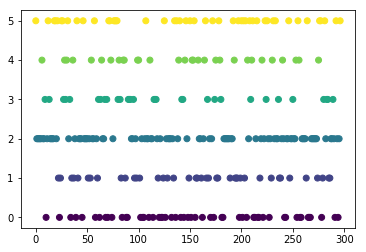

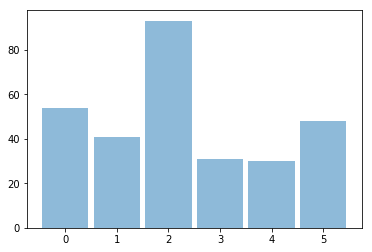

In [11]:
#calculando cluster en base al tópico mas frecuente
z=[]
for i in range(len(docs)):
    z.append(np.argmax(y[i]))
plt.scatter(range(297),z,c=z)

#distribución de cluster de acuerdo al cálculo anterior
show()
hist(z,bins=np.arange(-0.5,5.6,1),alpha=0.5,rwidth=0.9)#,density=True)
show()


<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº6: ¿Cómo se comparan estos resultados con los de  Kmeans?: Kmeans pareciera buscar una distribución más pareja de los tópicos relacionado a los documentos, mientras que en este caso tenemos diferencias más marcadas.
</p></div>


<div style="border: 2px solid #1c75c8; background-color: #F8B4B4">
<p>Una nueva estimación para algoritmo LDA considerando <a href="https://drive.google.com/open?id=1oSRRvG_W0UaH0l4o9f5ClEyWuGY1j-s0"> Gibbs Sampling</a>, disponible como desarrollo en <a href="https://github.com/lda-project/lda/">lda-project.</a></p> 
</div>

In [12]:
import lda

model = lda.LDA(n_topics=true_k, n_iter=5000, alpha=0.1, eta=0.1, random_state=3)
model.fit(tf)  # model.fit_transform(X) is also available

topic_word = model.topic_word_  # model.components_ also works
n_top_words=10
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(diccionario)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))
    


INFO:lda:n_documents: 297
INFO:lda:vocab_size: 705
INFO:lda:n_words: 2999
INFO:lda:n_topics: 6
INFO:lda:n_iter: 5000
/home/alan/anaconda3/lib/python3.6/site-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<0> log likelihood: -28756
INFO:lda:<10> log likelihood: -20858
INFO:lda:<20> log likelihood: -20492
INFO:lda:<30> log likelihood: -20375
INFO:lda:<40> log likelihood: -20249
INFO:lda:<50> log likelihood: -20157
INFO:lda:<60> log likelihood: -20198
INFO:lda:<70> log likelihood: -20158
INFO:lda:<80> log likelihood: -20069
INFO:lda:<90> log likelihood: -19992
INFO:lda:<100> log likelihood: -20094
INFO:lda:<110> log likelihood: -19988
INFO:lda:<120> log likelihood: -20011
INFO:lda:<130> log likelihood: -20127
INFO:lda:<140> log likelihood: -20016
INFO:lda:<150> log likel

INFO:lda:<2030> log likelihood: -19886
INFO:lda:<2040> log likelihood: -19885
INFO:lda:<2050> log likelihood: -19901
INFO:lda:<2060> log likelihood: -19882
INFO:lda:<2070> log likelihood: -19991
INFO:lda:<2080> log likelihood: -19874
INFO:lda:<2090> log likelihood: -19876
INFO:lda:<2100> log likelihood: -19971
INFO:lda:<2110> log likelihood: -20011
INFO:lda:<2120> log likelihood: -19894
INFO:lda:<2130> log likelihood: -19864
INFO:lda:<2140> log likelihood: -19993
INFO:lda:<2150> log likelihood: -19942
INFO:lda:<2160> log likelihood: -20005
INFO:lda:<2170> log likelihood: -19966
INFO:lda:<2180> log likelihood: -19946
INFO:lda:<2190> log likelihood: -19904
INFO:lda:<2200> log likelihood: -19898
INFO:lda:<2210> log likelihood: -20019
INFO:lda:<2220> log likelihood: -19882
INFO:lda:<2230> log likelihood: -19936
INFO:lda:<2240> log likelihood: -19945
INFO:lda:<2250> log likelihood: -19891
INFO:lda:<2260> log likelihood: -19905
INFO:lda:<2270> log likelihood: -19861
INFO:lda:<2280> log likel

INFO:lda:<4140> log likelihood: -19963
INFO:lda:<4150> log likelihood: -19873
INFO:lda:<4160> log likelihood: -19892
INFO:lda:<4170> log likelihood: -19881
INFO:lda:<4180> log likelihood: -19962
INFO:lda:<4190> log likelihood: -19873
INFO:lda:<4200> log likelihood: -19897
INFO:lda:<4210> log likelihood: -19891
INFO:lda:<4220> log likelihood: -19888
INFO:lda:<4230> log likelihood: -19892
INFO:lda:<4240> log likelihood: -19860
INFO:lda:<4250> log likelihood: -19966
INFO:lda:<4260> log likelihood: -19960
INFO:lda:<4270> log likelihood: -19914
INFO:lda:<4280> log likelihood: -19856
INFO:lda:<4290> log likelihood: -19924
INFO:lda:<4300> log likelihood: -19929
INFO:lda:<4310> log likelihood: -19844
INFO:lda:<4320> log likelihood: -19830
INFO:lda:<4330> log likelihood: -19943
INFO:lda:<4340> log likelihood: -19909
INFO:lda:<4350> log likelihood: -20019
INFO:lda:<4360> log likelihood: -19937
INFO:lda:<4370> log likelihood: -19952
INFO:lda:<4380> log likelihood: -19872
INFO:lda:<4390> log likel

Topic 0: media hack did like report news fake whi fake news total
Topic 1: https thank join interview thankyoutour2016 watch ticket https alabama ticket tonight
Topic 2: n't just state vote elect john wrong doe rate know
Topic 3: job u.s. trump mexico meet support great today new amp
Topic 4: great time make america peopl presid job mani world amp
Topic 5: https year veri rt look realdonaldtrump happi trump 's look forward


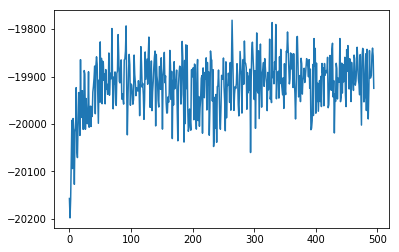

In [13]:
plt.plot(model.loglikelihoods_[5:])

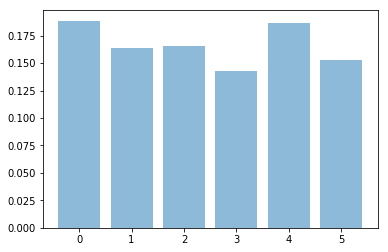

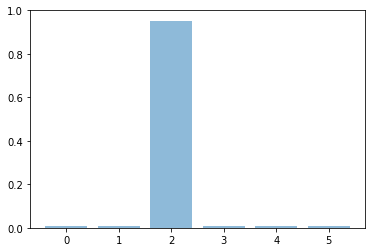

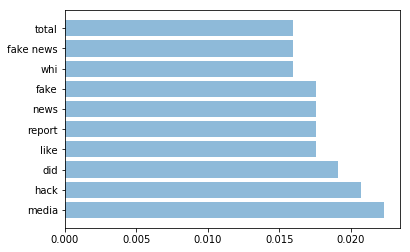

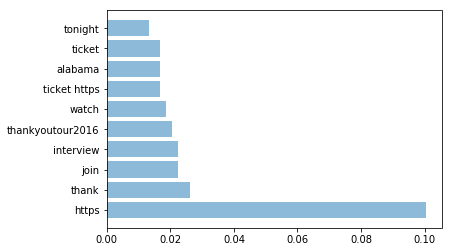

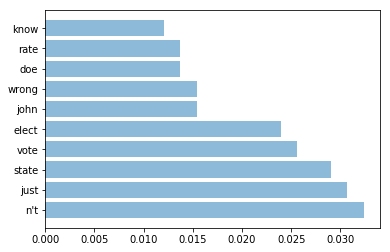

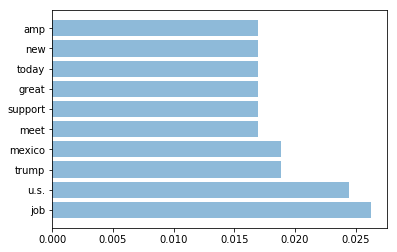

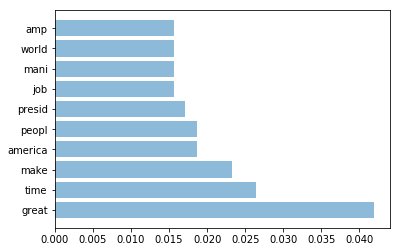

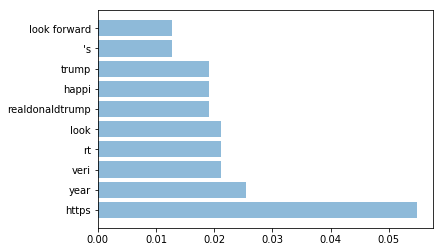

In [14]:
#Generando algunos gráficos de los resultados
from matplotlib.pylab import hist, show

y=model.doc_topic_
#distribución de tópicos en todos los documentos
dist = sum(y)/len(docs)
w=np.arange(0,true_k)
plt.bar(w,height=dist,alpha=0.5,tick_label=w)
show()

#distribución de tópicos en el documento 100
plt.bar(w,height=y[100],alpha=0.5,tick_label=w)
show()

#frecuencia de palabras por tópico
n_top_words=10
numo =np.arange(0,n_top_words)

for idx,topic in enumerate(model.topic_word_):
    d =[]
    s = []
    for i in topic.argsort()[:-n_top_words - 1:-1]:
          s.append(diccionario[i])
          d.append(topic[i])
    
    plt.barh(numo,width=d,alpha=0.5,tick_label=s)
    show()





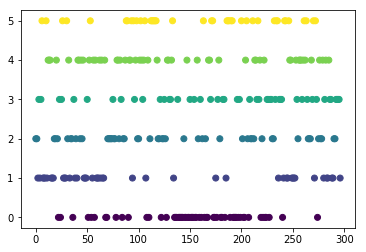

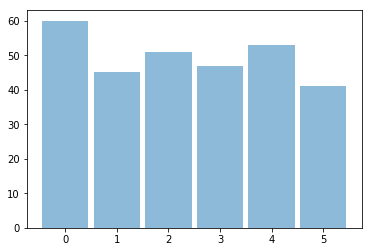

In [15]:
#calculando cluster en base al tópico mas frecuente
z=[]
for i in range(len(docs)):
    z.append(np.argmax(y[i]))
plt.scatter(range(297),z,c=z)
show()

#distribución de cluster de acuerdo a la definición anterior
hist(z,bins=np.arange(-0.5,5.6,1),alpha=0.5,rwidth=0.9)#,density=True)
show()



<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº7: ¿Cómo se comparan estos resultados con los anteriores? ¿Qué puede decir de la convergencia de la estimación en este caso?. Estos resultados parecen mejor distribuidos, se ve una distribución de documentos por tópico incluso más pareja que con kmeans. Parece que la convergencia es lograda más eficientemente.
</p></div>

<div style="border: 2px solid #1c75c8; background-color: #F8B4B4">
<p>Considerando este ejemplo realice el análisis de tópicos del set de datos en speeches.csv. 
Comente sus hallazgos </p> </div>